# Coal Mining 


Coal mining data from eia.gov

Combining and cleaning the raw csv files into a cleaned data set and coherent database.

Generally a good idea to have a separate data folder with the raw data.

When you clean the raw data, leave the raw in place, and create cleaned version with the steps included (ideal situation for Notebook). 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import numpy as np
import pandas as pd

In [2]:
dframe = pd.DataFrame.from_csv("../data/coal_prod_cleaned.csv")

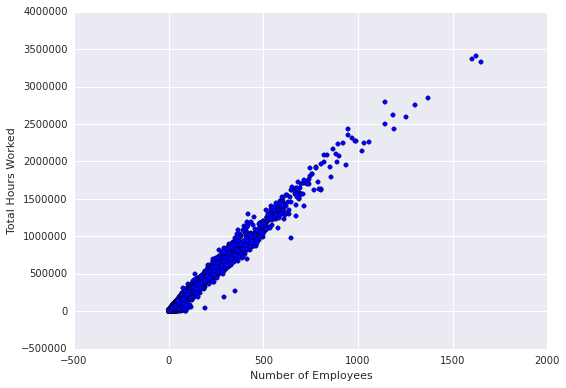

In [3]:
plt.scatter(dframe.Average_Employees, dframe.Labor_Hours)
plt.xlabel("Number of Employees")
plt.ylabel("Total Hours Worked")
plt.tight_layout()

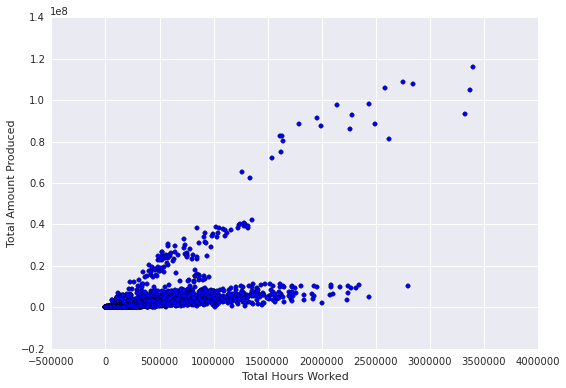

In [4]:
plt.scatter(dframe.Labor_Hours, dframe.Production_short_tons, )
plt.xlabel("Total Hours Worked")
plt.ylabel("Total Amount Produced") 
plt.tight_layout()

In [5]:
colors = sns.color_palette(n_colors=len(dframe.Year.unique())) 

In [6]:
color_dict = {key: value for key, value in zip(sorted(dframe.Year.unique()), colors)}

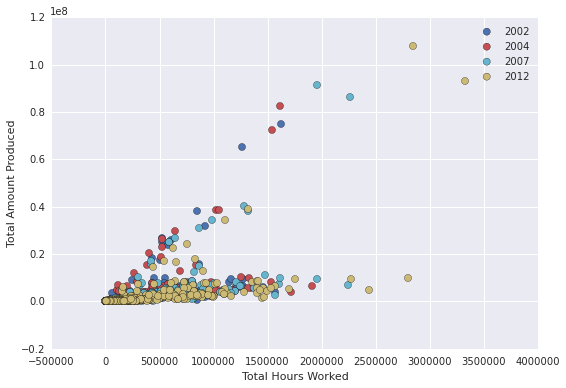

In [7]:
for year in sorted(dframe.Year.unique()[[0,2, 5, -1]]):
    plt.scatter(dframe[dframe.Year == year].Labor_Hours,
                dframe[dframe.Year == year].Production_short_tons, 
                c=color_dict[year],
                s=50,
                label=year,
               )
plt.xlabel("Total Hours Worked")
plt.ylabel("Total Amount Produced")
plt.legend()
plt.tight_layout()
# plt.savefig("../figures/ex1.png") 

In [8]:
dframe.head()

,Average_Employees,Company_Type,Labor_Hours,Mine_Basin,Mine_County,Mine_Name,Mine_State,Mine_Status,Mine_Type,Operating_Company,Operating_Company_Address,Operation_Type,Production_short_tons,Union_Code,Year
MSHA_ID,,,,,,,,,,,,,,,
102838,4,Independent Producer Operator,2712,Appalachia Southern,Bibb,Hebron Mine,Alabama,Permanently abandoned,Surface,Birmingham Coal & Coke Company,"2477 Valleydale Rd. S. B3, Birmingham, AL 35244",Mine only,10572,NaN,2002
103184,5,Independent Producer Operator,2480,Appalachia Southern,Fayette,Berry Mine,Alabama,Temporarily closed,Surface,Midas Coal Company Incorporate,"401 10th Avenue, S. E, Cullman, AL 35055",Mine only,9725,NaN,2002
100329,55,Operating Subsidiary,123618,Appalachia Southern,Jefferson,Concord Mine,Alabama,Active,Underground,U S Steel Mining Company Llc,"8800 Oak Grove Mine Road, Adger, AL 35006",Preparation Plant,0,United Mine Workers of America,2002
100851,331,Operating Subsidiary,748182,Appalachia Southern,Jefferson,Oak Grove Mine,Alabama,Active,Underground,U S Steel Mining Company Llc,"8800 Oak Grove Mine Rd, Adger, AL 35006",Mine only,1942153,United Mine Workers of America,2002
102354,28,Independent Producer Operator,55306,Appalachia Southern,Jefferson,Lindbergh,Alabama,Active,Surface,C & H Mining Company Inc,"P.O. Box 70250, Tuscaloosa, AL 35407",Mine only,168446,NaN,2002


In [9]:
dframe['Productivity'] = dframe['Production_short_tons']/dframe['Labor_Hours']

In [10]:
df2 = dframe.groupby('Mine_State').sum()

In [11]:
df2

,Average_Employees,Labor_Hours,Production_short_tons,Year,Productivity
Mine_State,,,,,
Alabama,45286,103976338,218530005,1348821,1.405346e+03
Alaska,1193,2781100,17630904,22077,6.963610e+01
Arizona,5472,13349729,104719892,40111,1.208227e+02
Arkansas,476,1088836,474255,46153,1.948146e+01
Colorado,24866,51027058,362933917,293007,8.564746e+02
Illinois,41727,93759448,380159693,698465,1.158498e+03
Indiana,34148,84440248,391024950,965269,1.722268e+03
Kansas,322,686154,2045911,34119,6.070076e+01
Kentucky (East),155047,340000595,905344436,11363294,1.408722e+04


In [12]:
df2 = df2[df2.index != 'Wyoming']

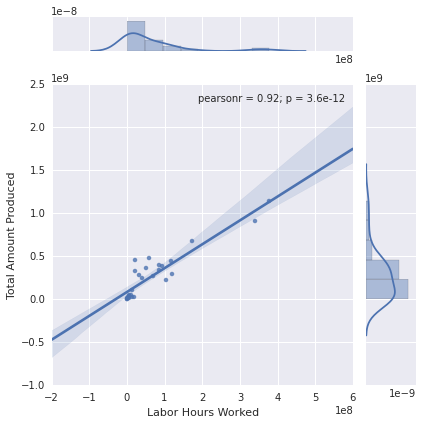

In [13]:
sns.jointplot('Labor_Hours', 'Production_short_tons', data=df2, kind="reg", ) 
plt.xlabel("Labor Hours Worked")
plt.ylabel("Total Amount Produced") 
plt.tight_layout()

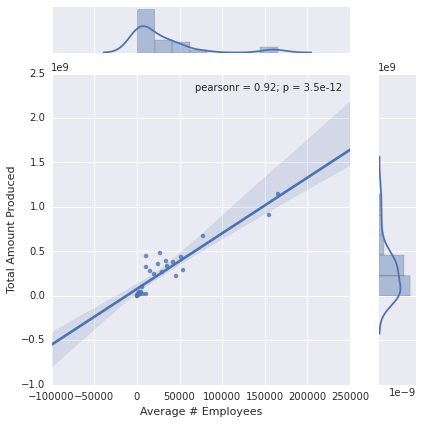

In [14]:
sns.jointplot('Average_Employees', 'Production_short_tons', data=df2, kind="reg", ) 
plt.xlabel("Average # Employees")
plt.ylabel("Total Amount Produced") 
plt.tight_layout()